In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [25]:


# Load parquet files
#df = pd.read_parquet('C:/Users/Admin/Downloads/analytics_3714b913_68f5_44eb_8cfc_a3e6955f3ab8.mvt_combo_line.parquet')
df = pd.read_parquet('analytics_ebaca63c_96a9_490a_a7da_e1eb6f7f3f0c.mvt_combo_line.parquet')
#df = pd.read_parquet('analytics_f3dc8773_d687_47b9_887d_6442c32d155c.mvt_combo_line.parquet')
#df = pd.read_parquet('analytics_fb5f05dd_74c6_41b7_bd8c_16bd1459d40b.mvt_combo_line.parquet')

In [36]:
# Sample the data
#df1 = df1.sample(frac=0.1, random_state=1)
#df2 = df2.sample(frac=0.1, random_state=1)
#df3 = df3.sample(frac=0.1, random_state=1)
#df4 = df4.sample(frac=0.1, random_state=1)

# Concatenate dataframes
#df = pd.concat([df1, df2, df3, df4])

* document_class (3=invoice, 4=return)
* extended_cost (unique cost of item times volume sold, line specific)
* extended_price (line specific, zero means discount or was not tracked)
* item_number (one-to-one mapping to item_description, used for data analysis)
* uofm (unit of measure)

In [26]:
df.columns

Index(['base_quantity', 'base_unit_cost', 'base_unit_price',
       'customer_account_status', 'customer_class', 'customer_id',
       'customer_name', 'customer_number', 'customer_sales_person_code',
       'customer_sales_person', 'discount', 'discount_amount', 'doc_date',
       'doc_external_id', 'doc_shipto_code', 'doc_shipto_display_name',
       'document_class', 'document_id', 'extended_cost', 'extended_price',
       'external_number', 'item_category_code', 'item_class',
       'item_description', 'item_number', 'item_type', 'item_vendor_item_no',
       'item_vendor_no', 'line_description', 'line_external_id', 'line_id',
       'line_markdown_amount', 'line_shipto_code', 'line_shipto_display_name',
       'line_warehouse_id', 'line_warehouse', 'markdown_percent',
       'price_level_id', 'quantity', 'sales_rep_id', 'sales_rep_name',
       'sales_territory_id', 'sales_territory', 'subtotal',
       'subtotal_net_discount', 'unit_cost', 'unit_price', 'uofm',
       'warehouse_

In [27]:
df.shape

(2155662, 50)

In [28]:
df['date'] = pd.to_datetime(df['doc_date'], unit='s')

In [29]:
df['date'].head()

0   2021-09-15
1   2021-09-15
2   2020-06-29
3   2019-09-09
4   2022-06-20
Name: date, dtype: datetime64[ns]

In [30]:
# Extract year and month from 'converted_date'
df['year_month'] = df['date'].dt.to_period('M')

In [31]:
df['year_month'].head()

0    2021-09
1    2021-09
2    2020-06
3    2019-09
4    2022-06
Name: year_month, dtype: period[M]

In [32]:
# Assuming 'df' has 'year_month', 'document_id', 'base_quantity', and 'subtotal' columns

# Group by 'year_month' and aggregate the unique count of 'document_id', sum of 'base_quantity', and sum of 'subtotal'
aggregated_df = df.groupby('year_month').agg({
    'document_id': pd.Series.nunique,  # Unique count of document IDs (invoices)
    'quantity': 'sum',            # Sum of base quantity
    'subtotal': 'sum'                  # Sum of subtotal
}).reset_index()

# Renaming the columns for clarity
aggregated_df.columns = ['Year-Month', 'Total Invoice', 'Quantity', 'Total Dollar Value']

# Display the first few rows of the aggregated DataFrame
print(aggregated_df.head())

  Year-Month  Total Invoice    Quantity Total Dollar Value
0    2018-07              5     9.00000             514.85
1    2018-08             47    66.00000            5024.30
2    2018-09             45    48.00000            3348.46
3    2018-10            270  1466.00000          166108.24
4    2018-11           2895  5655.00000          369790.93


In [22]:

# Filter data to include only entries from 2017-01 onwards
aggregated_df = aggregated_df[aggregated_df['Year-Month'] >= '2017-01']

# Check the filtered data
print(aggregated_df)

    Year-Month  Total Invoice      Quantity Total Dollar Value
12     2017-01           2954  135559.00000         3131689.62
13     2017-02           2355  188652.00000         2839562.43
14     2017-03           2839  133610.00000         3427511.50
15     2017-04           2529  153710.00000         2928509.95
16     2017-05           2821  146453.00000         3510588.58
..         ...            ...           ...                ...
100    2024-05           3901  223760.00000         5599280.29
101    2024-06           3480  101681.00000         4775235.83
102    2024-07           3421   77280.00000         5010622.21
103    2024-08           3326   84940.00000         5115736.55
104    2024-09            373    7374.00000          617523.92

[93 rows x 4 columns]


In [33]:
aggregated_df.dtypes

Year-Month            period[M]
Total Invoice             int64
Quantity                 object
Total Dollar Value       object
dtype: object

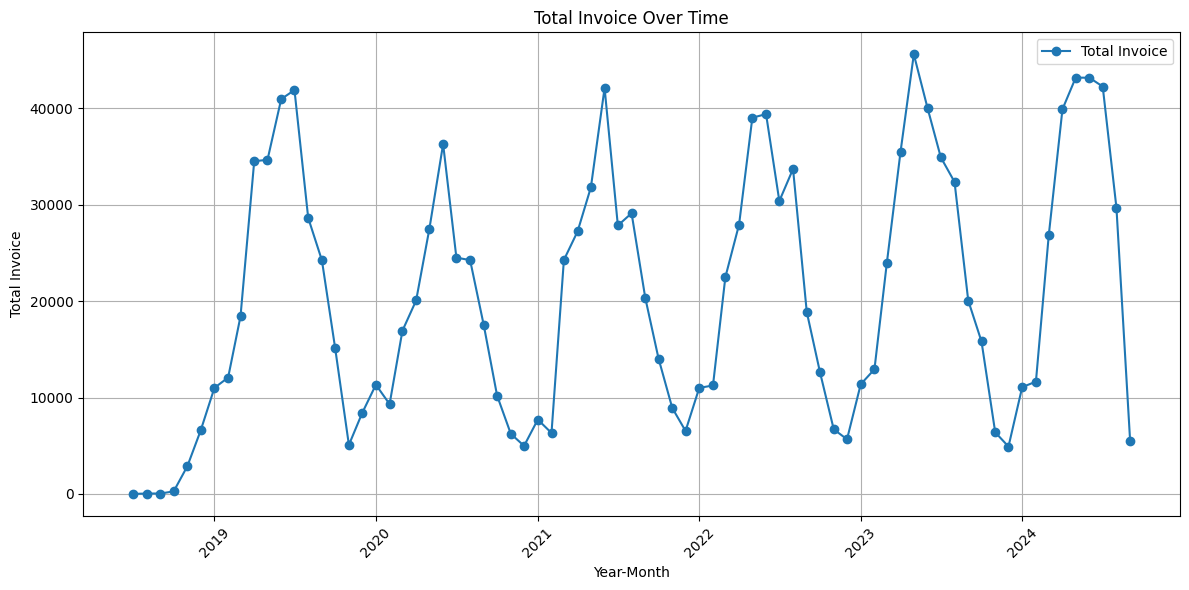

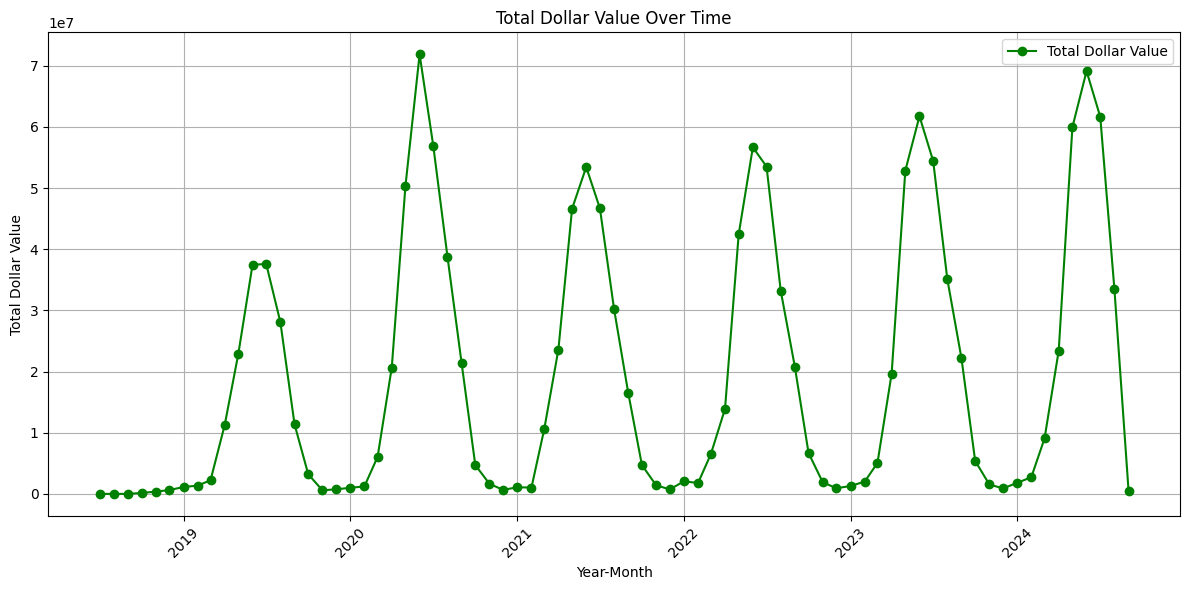

In [34]:
import matplotlib.pyplot as plt

# Convert 'Year-Month' from Period to datetime
aggregated_df['Year-Month'] = aggregated_df['Year-Month'].dt.to_timestamp()

# Ensure 'Total Invoice' and 'Total Dollar Value' are numeric
aggregated_df['Total Invoice'] = pd.to_numeric(aggregated_df['Total Invoice'], errors='coerce')
aggregated_df['Total Dollar Value'] = pd.to_numeric(aggregated_df['Total Dollar Value'], errors='coerce')

# Plotting the time series for 'Total Invoice'
plt.figure(figsize=(12, 6))
plt.plot(aggregated_df['Year-Month'], aggregated_df['Total Invoice'], marker='o', label='Total Invoice')
plt.title('Total Invoice Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Invoice')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting the time series for 'Total Dollar Value'
plt.figure(figsize=(12, 6))
plt.plot(aggregated_df['Year-Month'], aggregated_df['Total Dollar Value'], marker='o', color='green', label='Total Dollar Value')
plt.title('Total Dollar Value Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Dollar Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


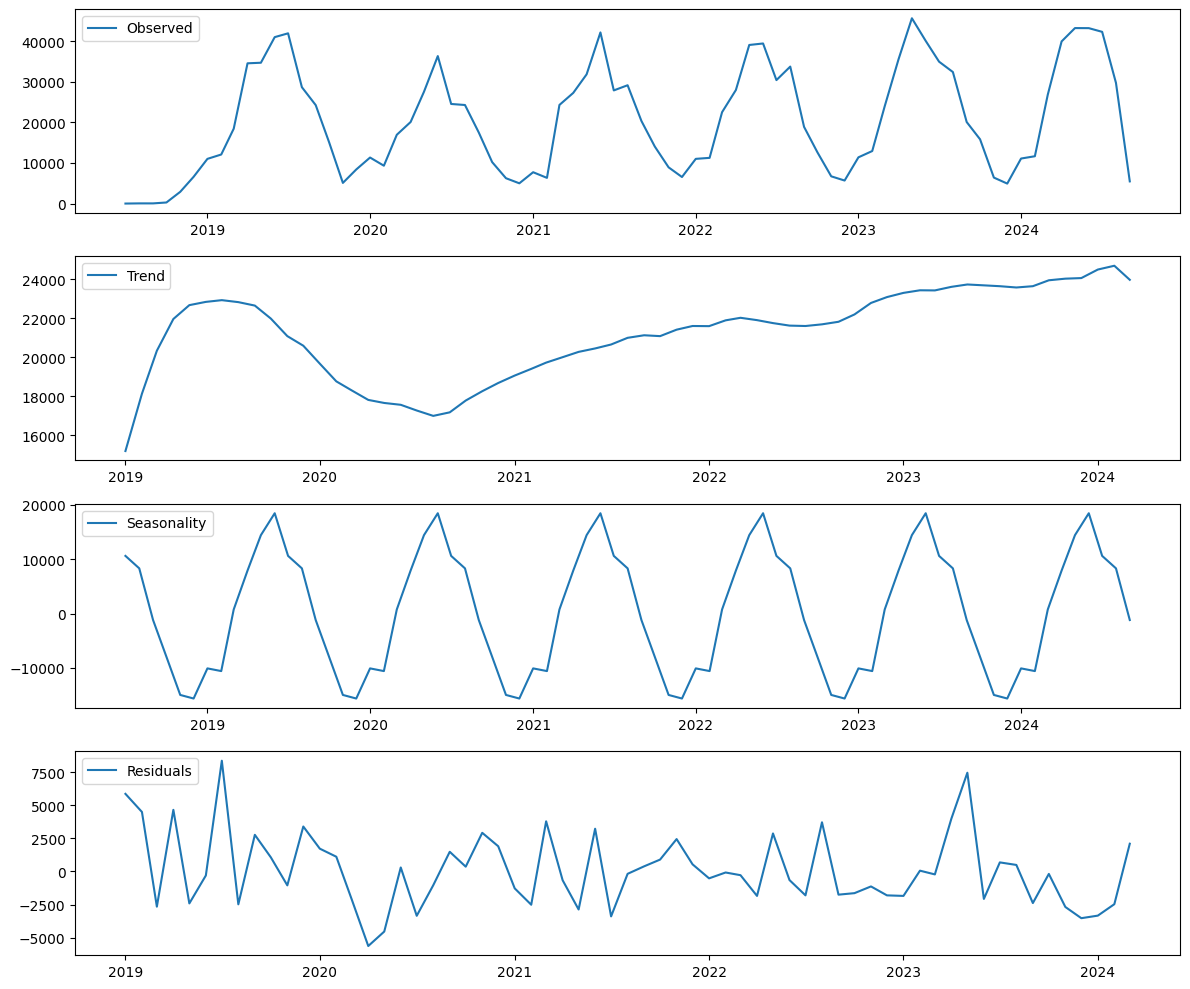

In [35]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Ensure 'Year-Month' is set as the index and is a datetime index
aggregated_df['Year-Month'] = pd.to_datetime(aggregated_df['Year-Month'])
aggregated_df.set_index('Year-Month', inplace=True)

# Specify the frequency (e.g., 12 for monthly data to capture yearly seasonality)
decomposition = seasonal_decompose(aggregated_df['Total Invoice'], model='additive', period=12)

# Plot the decomposed components
plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Summary of Insights
Growth and Stabilization: The total invoices showed growth until 2020, after which they stabilized.
Seasonal Patterns: The data exhibits strong seasonality, indicating predictable cycles in invoice values over the year.
Cyclical or Irregular Events: Around 2020, there were notable irregularities (possibly due to external factors like economic changes), which were not fully explained by the trend or seasonality alone.
Recent Stability: Since 2022, the data appears to have reached a stable phase with minor fluctuations, suggesting a more predictable pattern in recent years.

In [36]:
from pmdarima import auto_arima

# Run auto_arima to find the best SARIMA model for your data
# Set seasonal=True for SARIMA and m=12 for monthly data with yearly seasonality
auto_model = auto_arima(aggregated_df['Total Invoice'], 
                        seasonal=True, 
                        m=12,                # 12 for yearly seasonality if data is monthly
                        trace=True,          # To print progress
                        suppress_warnings=True, 
                        stepwise=True)       # Use stepwise search to reduce computation time

# Print the summary of the selected model
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=3.24 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1324.827, Time=0.10 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1254.304, Time=0.39 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.08 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1325.789, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1256.818, Time=0.08 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1256.161, Time=1.30 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=1256.020, Time=0.66 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=1254.079, Time=0.33 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=1255.998, Time=0.98 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=1257.997, Time=2.42 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1314.731, Time=0.19 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=1255.007, Time=0.31 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=1255.019, Time=0.32 sec
 ARIMA(2,0,1)(0,1,1)[12] inte

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


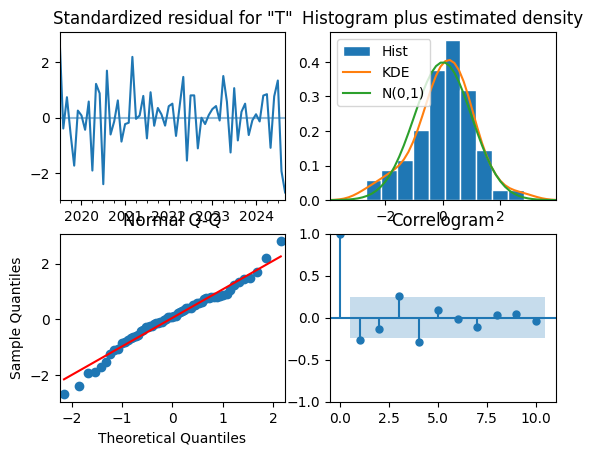

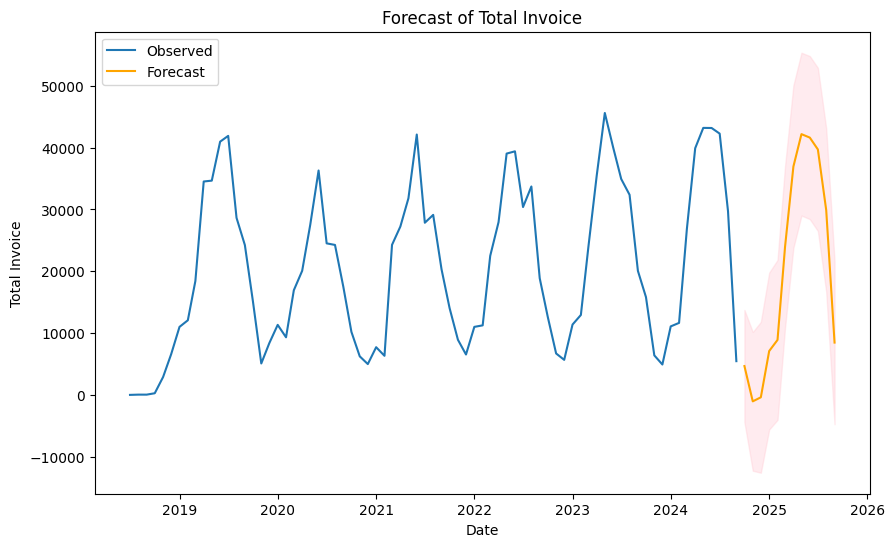

In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Get the best parameters from auto_arima
best_order = auto_model.order  # (p, d, q)
best_seasonal_order = auto_model.seasonal_order  # (P, D, Q, S)

# Define and fit the SARIMA model with the best parameters
model = SARIMAX(aggregated_df['Total Invoice'], 
                order=best_order, 
                seasonal_order=best_seasonal_order)
results = model.fit()

# Plot diagnostics to check model fit
results.plot_diagnostics()
plt.show()

# Forecast future values (for example, next 12 months)
forecast = results.get_forecast(steps=12)
forecast_ci = forecast.conf_int()

# Plot the forecast with confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(aggregated_df['Total Invoice'], label='Observed')
plt.plot(forecast.predicted_mean, label='Forecast', color='orange')
plt.fill_between(forecast_ci.index, 
                 forecast_ci.iloc[:, 0], 
                 forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title("Forecast of Total Invoice")
plt.xlabel("Date")
plt.ylabel("Total Invoice")
plt.legend()
plt.show()


In [43]:
# Define the split point (e.g., last 12 months as test set)
split_point = int(len(aggregated_df) * 0.8)  # 80% train, 20% test
train = aggregated_df.iloc[:split_point]
test = aggregated_df.iloc[split_point:]


In [44]:
from pmdarima import auto_arima

# Find the best SARIMA model for the training set
auto_model = auto_arima(train['Total Invoice'], 
                        seasonal=True, 
                        m=12,                # 12 for yearly seasonality if data is monthly
                        trace=True,          # To print progress
                        suppress_warnings=True, 
                        stepwise=True)

# Print the summary of the selected model
print(auto_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.38 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1019.021, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=954.946, Time=0.11 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1020.103, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=958.555, Time=0.07 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=956.785, Time=0.84 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=956.655, Time=0.28 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=954.674, Time=0.28 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=956.661, Time=0.28 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=1.96 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1009.022, Time=0.14 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=955.036, Time=0.39 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=955.607, Time=0.22 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


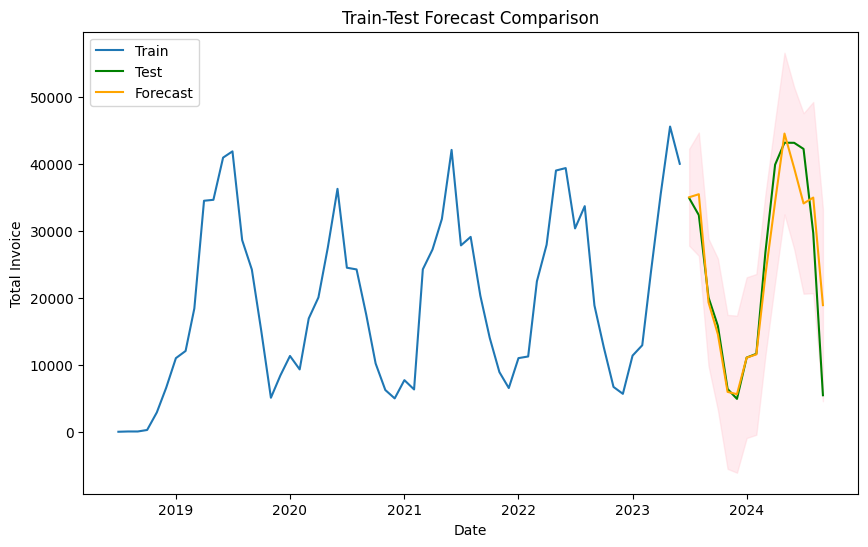

In [45]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

# Extract the best order from auto_arima
best_order = auto_model.order
best_seasonal_order = auto_model.seasonal_order

# Fit the SARIMA model on the training data
model = SARIMAX(train['Total Invoice'], order=best_order, seasonal_order=best_seasonal_order)
results = model.fit()

# Forecast the length of the test set
forecast = results.get_forecast(steps=len(test))
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the actual vs forecasted values
plt.figure(figsize=(10, 6))
plt.plot(train['Total Invoice'], label='Train')
plt.plot(test['Total Invoice'], label='Test', color='green')
plt.plot(forecast_values, label='Forecast', color='orange')
plt.fill_between(forecast_ci.index, 
                 forecast_ci.iloc[:, 0], 
                 forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title("Train-Test Forecast Comparison")
plt.xlabel("Date")
plt.ylabel("Total Invoice")
plt.legend()
plt.show()


In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate error metrics
mae = mean_absolute_error(test['Total Invoice'], forecast_values)
rmse = np.sqrt(mean_squared_error(test['Total Invoice'], forecast_values))
mape = np.mean(np.abs((test['Total Invoice'] - forecast_values) / test['Total Invoice'])) * 100

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


Mean Absolute Error (MAE): 3162.6559598864073
Root Mean Square Error (RMSE): 4806.563427786978
Mean Absolute Percentage Error (MAPE): 24.36319416131756%


High MAPE (50.09%):

The Mean Absolute Percentage Error (MAPE) of 50.09% suggests that the model’s predictions are, on average, off by 50% relative to the actual values. In forecasting, a MAPE above 20% is generally considered high, and a MAPE above 50% indicates that the model may not be well-suited for capturing the patterns in the data accurately.
This high MAPE indicates the presence of complex patterns, such as irregular cycles, that SARIMA struggles to capture effectively.
Impact of Cyclicity:

The presence of cyclicity in your data (i.e., patterns that occur at irregular intervals rather than fixed seasonal cycles) may be a key reason for the high error rates. SARIMA is typically more suited for regular seasonality, and while it can model some cyclic patterns, it may not fully capture irregular or long-term cycles.
Cyclic patterns often require more flexible or complex models, which can adapt to varying frequencies and amplitudes over time.
Error Metrics and Forecast Reliability:

The high RMSE (775.02) compared to MAE (354.08) indicates that there may be some larger forecast errors in specific time periods. This discrepancy suggests that while the model does reasonably well in some instances, it fails significantly in others, likely due to the cyclic patterns or outliers.
Given these metrics, the current SARIMA model may not be reliable for high-accuracy forecasting over time and may struggle to provide actionable insights based on predicted values.
Next Steps and Model Refinement:

To better capture cyclicity, consider trying a model that can incorporate flexible cycles, such as Prophet with Fourier terms or a machine learning-based model (e.g., LSTM or XGBoost).
If external factors are influencing the cyclicity, integrating relevant exogenous variables (e.g., economic indicators, industry events) into the model may improve forecasting accuracy.
Business Implications:

Due to the high forecast error, any decisions made based on this model's predictions should be approached cautiously. It may be more useful for observing general trends rather than precise forecasting.
Investing in model refinement to handle cyclic patterns effectively can improve forecast accuracy, making the model more suitable for decision-making.

In [47]:
# Calculate residuals
residuals = test['Total Invoice'] - forecast_values


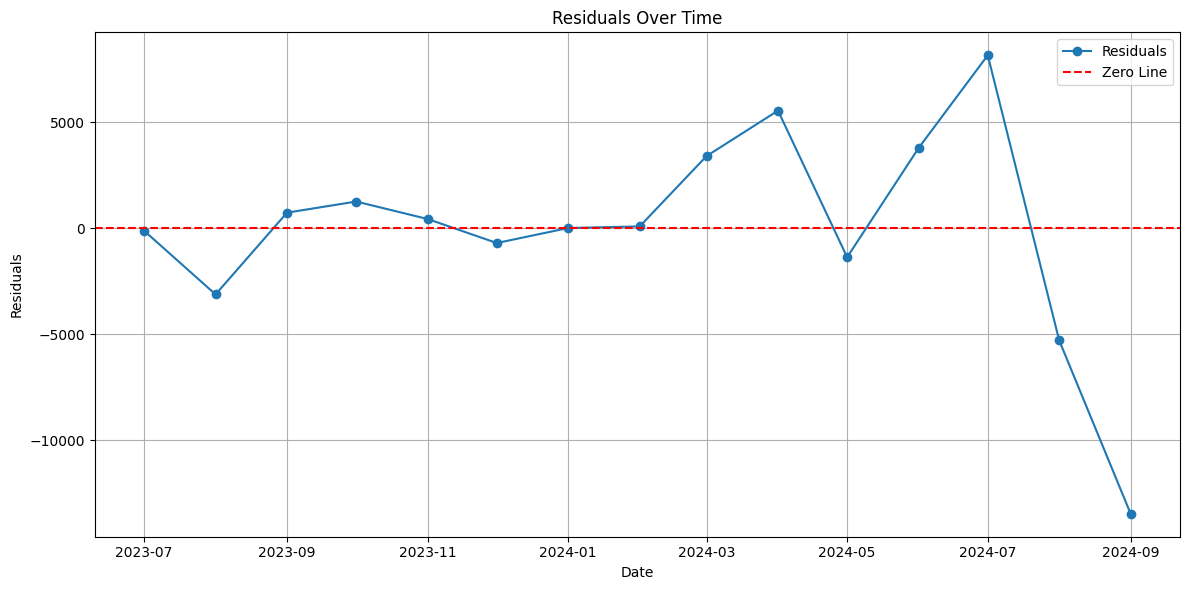

In [48]:
import matplotlib.pyplot as plt

# Plot residuals over time
plt.figure(figsize=(12, 6))
plt.plot(test.index, residuals, marker='o', label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Line')
plt.title('Residuals Over Time')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


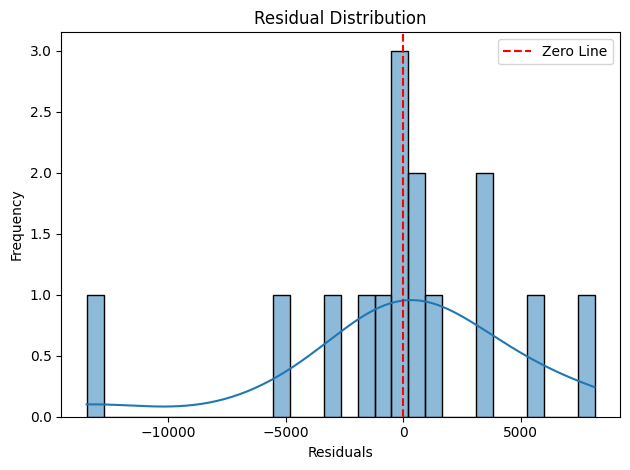

In [49]:
import seaborn as sns

# Plot histogram with KDE
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='--', label='Zero Line')
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


In [51]:
from scipy.stats import shapiro

# Shapiro-Wilk Test
stat, p = shapiro(residuals)
print(f"Shapiro-Wilk Test Statistic: {stat}, p-value: {p}")

if p > 0.05:
    print("Residuals are normally distributed (fail to reject H0).")
else:
    print("Residuals are not normally distributed (reject H0).")


Shapiro-Wilk Test Statistic: 0.9025661983074699, p-value: 0.10417057925252265
Residuals are normally distributed (fail to reject H0).


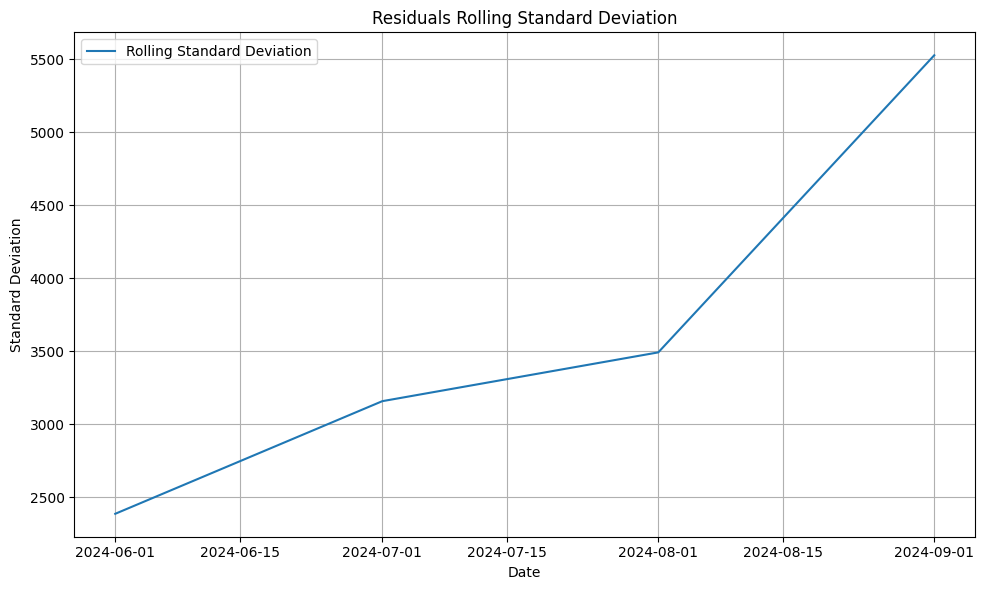

In [52]:
# Calculate rolling standard deviation
rolling_std = residuals.rolling(window=12).std()

# Plot rolling standard deviation
plt.figure(figsize=(10, 6))
plt.plot(rolling_std, label='Rolling Standard Deviation')
plt.title('Residuals Rolling Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Is Your Model "Good"?
Yes, for basic forecasting:
If your goal is to capture general trends and seasonality and you’re not aiming for precise predictions during volatile periods, the model is adequate.
No, for high accuracy or volatile scenarios:
If you require high precision (e.g., for financial planning or operational forecasting) or need to handle volatile periods effectively, the model needs improvement.